In [5]:
from sklearn import datasets
import numpy as np
%matplotlib inline

In [6]:
#导入iris数据
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='b',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [10]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

在iris上使用SVM模型

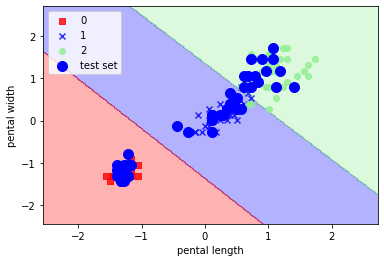

In [12]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()

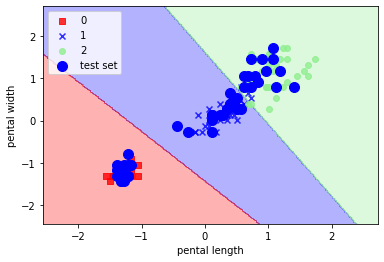

In [13]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",C=10.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()

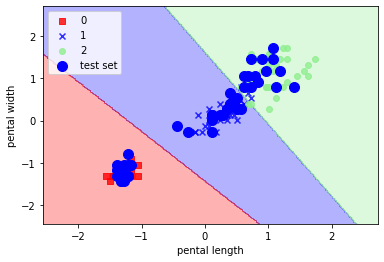

In [14]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",C=10.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()

线性不可分数据集示例

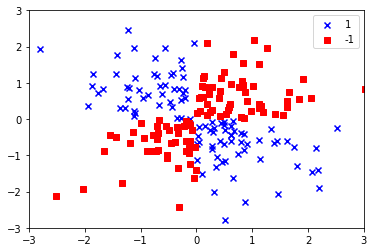

In [16]:
np.random.seed(1)
#产生异或的数据集
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c="b",
            marker="x",
           label=1)
plt.scatter(X_xor[y_xor==-1,0],
            X_xor[y_xor==-1,1],
            c="r",
            marker="s",
           label=-1)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc="best")
plt.show()

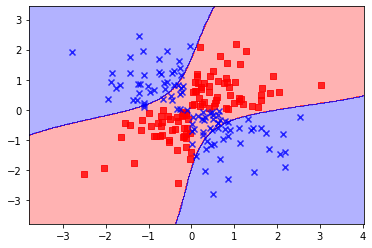

In [17]:
#使用高斯核函数
svm=SVC(kernel="rbf",random_state=1,gamma=0.1,C=1.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.show()

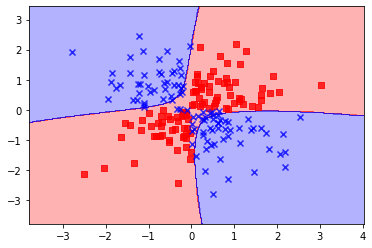

In [18]:
svm=SVC(kernel="rbf",random_state=1,gamma=0.1,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.show()

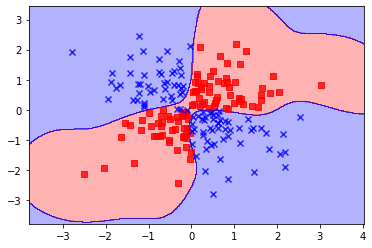

In [19]:
svm=SVC(kernel="rbf",random_state=1,gamma=1.0,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.show()

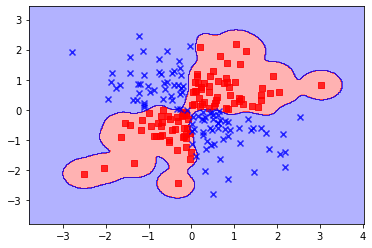

In [20]:
svm=SVC(kernel="rbf",random_state=1,gamma=10.0,C=1.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.show()

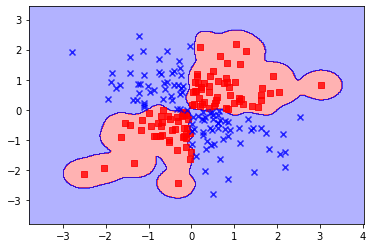

In [23]:
svm=SVC(kernel="rbf",random_state=1,gamma=10.0,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.show()

# KNN

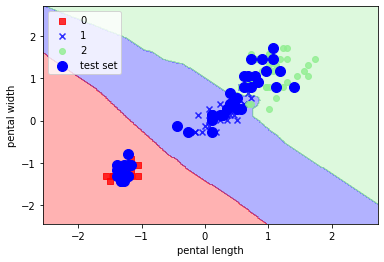

In [27]:
from sklearn.neighbors import KNeighborsClassifier
#p=1曼哈顿距离,p=2欧氏距离
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()

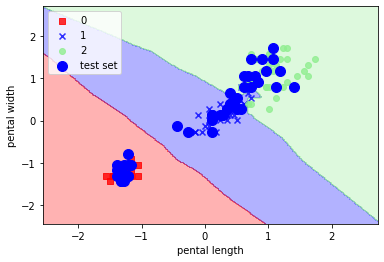

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,p=2,metric="minkowski")
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()

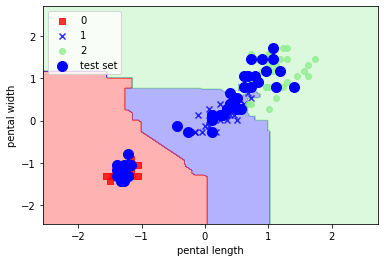

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,p=1,metric="minkowski")
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()

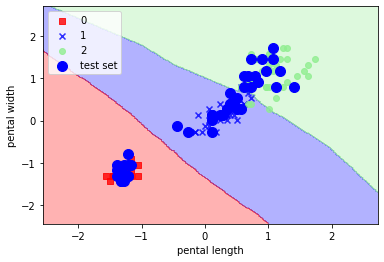

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10,p=2,metric="minkowski")
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(100,150))
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend(loc="upper left")
plt.show()